In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,SGDRegressor 
from sklearn.preprocessing import PolynomialFeatures,StandardScaler 
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
x = 6* np.random.rand(200,1) - 3 
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)

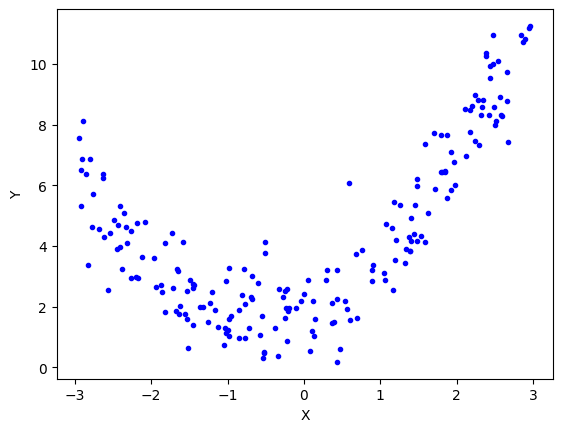

In [3]:
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [5]:
model=LinearRegression()

In [6]:
model.fit(x_train,y_train)

LinearRegression()

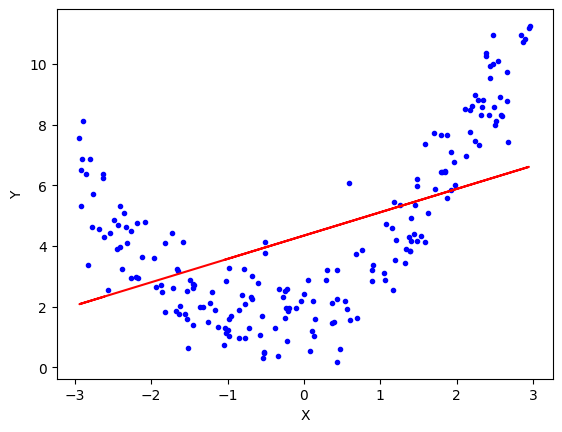

In [7]:
plt.plot(x,y,'b.')
plt.plot(x_train,model.predict(x_train),c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
poly=PolynomialFeatures(degree=2)

x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [9]:
print(x_train[0])
print(x_train_trans[0])

[-1.03213153]
[ 1.         -1.03213153  1.0652955 ]


In [10]:
model=LinearRegression()
model.fit(x_train_trans,y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test_trans)

In [12]:
r2_score(y_test,y_pred)

0.9009136720694464

In [13]:
print(model.coef_)
print(model.intercept_)

[[0.         0.85177899 0.805467  ]]
[1.88755183]


In [14]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new=model.predict(x_new_poly)

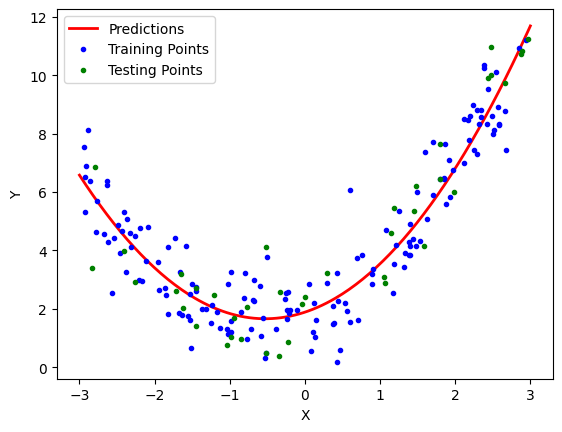

In [15]:
plt.plot(x_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(x_train,y_train,"b.",label="Training Points")
plt.plot(x_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [16]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

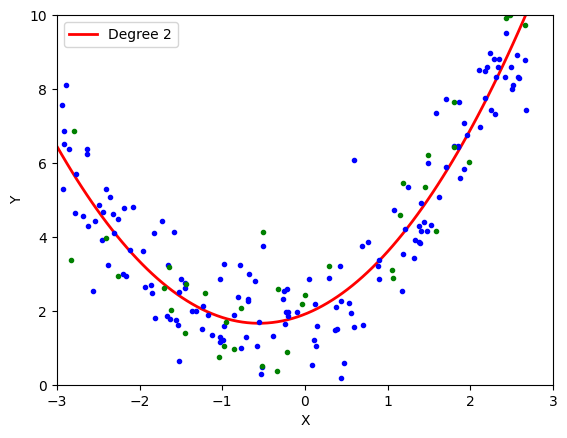

In [17]:
polynomial_regression(2)

In [18]:
x = 7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8

z= x**2 +y**2 +0.2*x +0.2*y +0.1*x*y + 2 +np.random.randn(100,1)

In [19]:
import plotly.express as px 
df= px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [20]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [21]:

import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [22]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [23]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [24]:
print("Powers\n",poly.powers_)

Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [11  3]
 [10  4]
 [

In [25]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [26]:

X_test_multi = poly.transform(final)

In [27]:

z_final = lr.predict(X_multi_trans).reshape(10,10)


In [28]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()